# California Housing

The dataset is common and readily available for download from the sklearn library.
<br>
This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Objective

1) To attempt to see if there are any correlation between the parameters and predicting the Median Housing Value.
<br> 
2) To attempt to get the best accuracy score using various supervised machine learning algorithms.

## To do list
Below would be my train of thought of the things need to be done in order to process the dataset and to get the algorithm to predict. I will be using it as a task list to check off items done as well.

- understand the database and the parameters [done]
- any missing/blank values in the dataset? [done]
- check data information & distribution of data [done]
- account for any outliers? [done]
- any correlation so that can drop off data? [done]
- Hypothesis Testing if any? [done]
- train / validation / test dataset split? [done]
- Feature Scaling [done]
- ratio of targets? is it sufficient? Does it require upsampling/downsampling? [done]
- PCA decomposition required? [done]
- various Algorithms to be used [done]
- need to build pipeline? [done]
- predict accuracy and Confusion metrics [done]
- ROC & AUC [done]
- conclusion [done]

In [1]:
# Import libraries which will be used.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = fetch_california_housing()
y = df.target
df = pd.DataFrame(df.data, columns=df.feature_names)
df['MedianHouseValue'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Understanding parameters

Below are the definition of the parameters from sklearn website.
<br>MedInc: median income in block
<br>HouseAge: median house age in block
<br>AveRooms: average number of rooms
<br>AveBedrms: average number of bedrooms
<br>Population: block population
<br>AveOccup: average house occupancy
<br>Latitude: house block latitude
<br>Longitude: house block longitude
<br>MedianHouseValue: Target Column, median house value in block

# Exploratory Data Analysis

### Check missing values

In [3]:
# Check if there are any missing values in the dataset

df.isnull().sum()

MedInc              0
HouseAge            0
AveRooms            0
AveBedrms           0
Population          0
AveOccup            0
Latitude            0
Longitude           0
MedianHouseValue    0
dtype: int64

From the above, there doesn't seem to be any missing value points.

### Check database information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


At first glance, there doesn't seem like any unusual figures in the data, ie aveRooms=0. 
<br> However, I do observe that there are significant outliers in the data as the max values are quite far away from the 3rd Quartile, such as aveRooms & aveBedrms. Rare few of the houses must be really huge to have so many rooms and bedrooms. 
<br> In addition, some of the parameters have high standard deviation, which would suggest that there is a wide range of distribution values for the parameters.

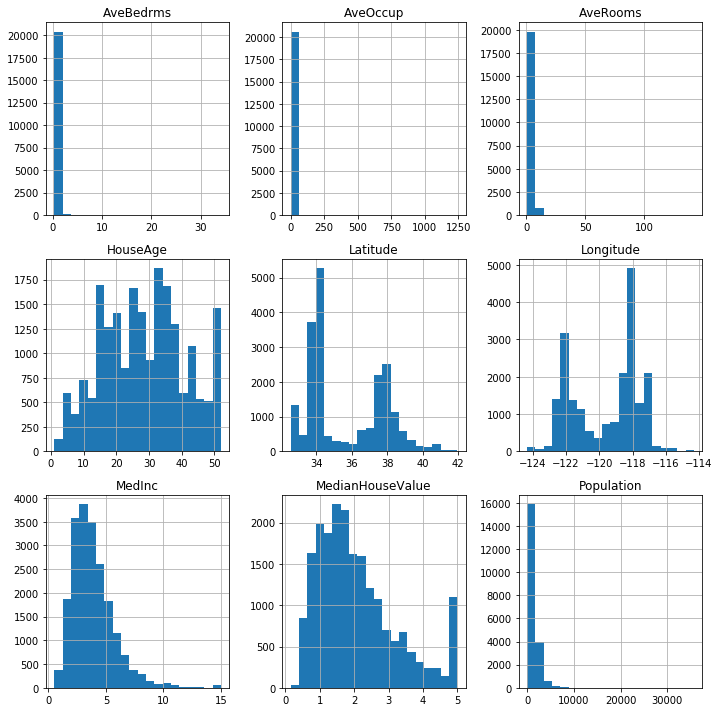

In [6]:
# Histogram plot of data

col = list(df.columns)
df[col].hist(stacked=True, bins=20, figsize=(10,10), layout=(3,3))
plt.tight_layout()

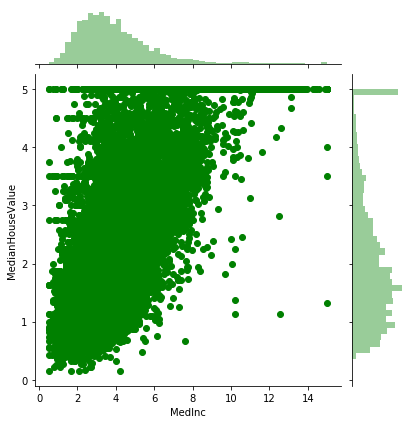

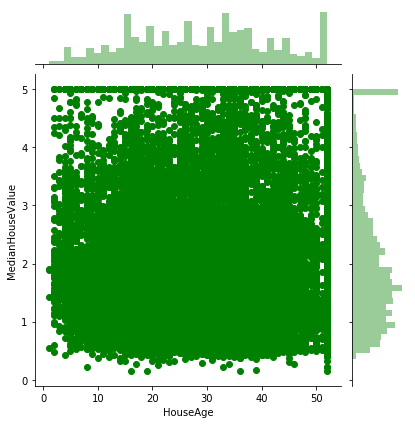

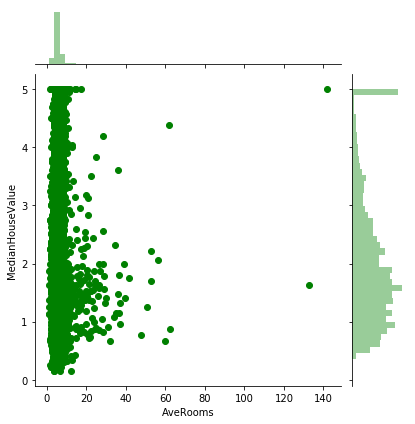

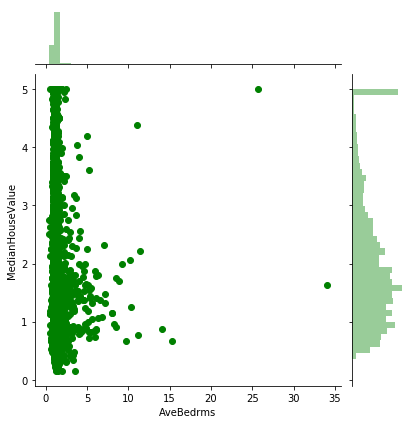

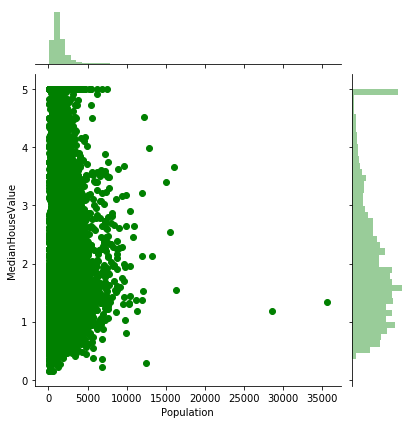

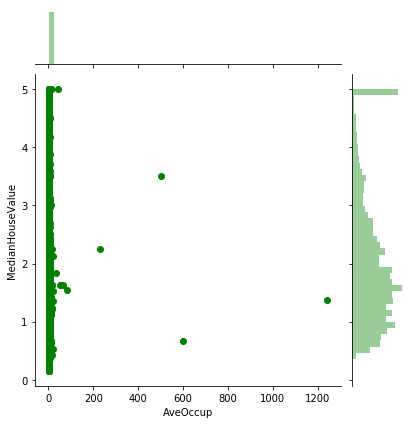

In [7]:
for i in col[:-3]:
    sns.jointplot(i, "MedianHouseValue", data=df,color="g")

The above charts paint a slightly messy picture. What I can tell from the histograms, is that most of the data, including the MedianHouseValue, is positively skewed, having outliers with high values. This is made more apparent by the jointplot, where we can see that there are a few data points with high values that skew the data significantly.
<br> Additionally, there is no clear distinct relationship between the parameters and MedianHouseValue, apart from MedInc, where a high number of people with lower MedInc have properties which have higher MedianHouseValue.
<br> Since there doesn't seem to have much impact/difference for AveOccup on the MedianHouseValue (due to the close to vertical line of data plotted for AveOccup against MedianHouseValue), I might drop this variable from the machine learning algorithm.
<br> Similarly for AveBedrms, AveRooms, the MedianHouseValue is clustered tightly and mostly for low values.

### Account for outliers?

As mentioned previously, it is clear that the parameter data is signficantly skewed, with outliers having very huge values away from the rest of the distribution of the parameter. Hence, there is a need to winsorize it. This will allow us to retain the data, but will reduce the variance, due to the removal of the outliers via replacing it with either the median or quartile values.
<br> However, using the below winsorization function method, I have instead decided to replace the outlier values with the nearest quartile values instead. This will help to reduce the impact of change in variance as compared to replacing outlier values with median values.

In [8]:
# Function to count the data columns beyond the lower & upper whiskers which require winsorization
def df_winsorization_count(df,col):
    for i in col:
        cnt = df[i].count()
        q1, q2 = df[i].quantile([0.25, 0.75])
        iqr = q2 - q1
        lwr_whisk = max(0,q1 - 1.5*iqr)
        upp_whisk = q2 + 1.5*iqr

        upp_whisk_cnt = str(df[(df[i]>upp_whisk)].count()[i])
        lwr_whisk_cnt = str(df[(df[i]<lwr_whisk)].count()[i])
        print ('Data column ' + i + ' has ' + lwr_whisk_cnt + ' below the lower whisker and ' + \
               upp_whisk_cnt + ' above the upper whisker out of a total count of ' + str(cnt) + '.')

# Function to winsorize the data in the columns
def df_winsorization(df,col):
    for i in col:
        q1, q2 = df[i].quantile([0.25, 0.75])
        iqr = q2 - q1
        lwr_whisk = max(0,q1 - 1.5*iqr)
        upp_whisk = q2 + 1.5*iqr

        df.loc[df[i] < lwr_whisk, i] = lwr_whisk
        df.loc[df[i] > upp_whisk, i] = upp_whisk

In [9]:
# Outlier count before winsorization
df_winsorization_count(df,col)

Data column MedInc has 0 below the lower whisker and 681 above the upper whisker out of a total count of 20640.
Data column HouseAge has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column AveRooms has 45 below the lower whisker and 466 above the upper whisker out of a total count of 20640.
Data column AveBedrms has 188 below the lower whisker and 1236 above the upper whisker out of a total count of 20640.
Data column Population has 0 below the lower whisker and 1196 above the upper whisker out of a total count of 20640.
Data column AveOccup has 7 below the lower whisker and 704 above the upper whisker out of a total count of 20640.
Data column Latitude has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column Longitude has 20640 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column MedianHouseValue has 0 below the lower whisker and 1071 above the upper

In [10]:
col_win = df.columns[:-3]

# Outlier count after winsorization
df_winsorization(df,col_win)
df_winsorization_count(df,col)

Data column MedInc has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column HouseAge has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column AveRooms has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column AveBedrms has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column Population has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column AveOccup has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column Latitude has 0 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column Longitude has 20640 below the lower whisker and 0 above the upper whisker out of a total count of 20640.
Data column MedianHouseValue has 0 below the lower whisker and 1071 above the upper whisker out of

It does not make sense to winsorize the latitude and longitude, as they refer to point locations on a map, hence I have excluded them along with the MedianHouseValue, which is what we want to predict from the winsorization. We are then ready to proceed with using the data.

### Check Correlation of data

In [11]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
MedInc,1.000000,-0.142435,0.657482,-0.227488,0.000984,-0.069799,-0.084654,-0.015461,0.689001
HouseAge,-0.142435,1.000000,-0.230360,-0.132477,-0.307620,-0.006318,0.011173,-0.108197,0.105623
AveRooms,0.657482,-0.230360,1.000000,0.176210,-0.097907,-0.035624,0.128647,-0.068379,0.311003
AveBedrms,-0.227488,-0.132477,0.176210,1.000000,0.002474,-0.121060,0.063221,0.011850,-0.096055
Population,0.000984,-0.307620,-0.097907,0.002474,1.000000,0.225746,-0.133225,0.116115,-0.032739
AveOccup,-0.069799,-0.006318,-0.035624,-0.121060,0.225746,1.000000,-0.170149,0.178649,-0.281148
Latitude,-0.084654,0.011173,0.128647,0.063221,-0.133225,-0.170149,1.000000,-0.924664,-0.144160
Longitude,-0.015461,-0.108197,-0.068379,0.011850,0.116115,0.178649,-0.924664,1.000000,-0.045967
MedianHouseValue,0.689001,0.105623,0.311003,-0.096055,-0.032739,-0.281148,-0.144160,-0.045967,1.000000


From the data above, most of the data appear to be uncorrelated, apart from latitude and longitude, which makes sense as they correspond to coordinates.
Even for the previously mentioned AveRooms, AveBedrms and AveOccup, there appears to be a weak negative correlation with MedianHouseValue. Doesn't seem like I will be able to drop the parameters.

### Hypothesis Testing

I will perform a simple hypothesis test to check for the correlation between latitude and longitude.

In [12]:
#Assuming a 5% significance level for all the tests
alpha = 0.05

def hypothesis_result(p_value):
    p_value = round(p_value,4)
    if p_value < alpha:
        print ("As p-value is ",p_value,", which is lower than the significance level, we reject the null hypothesis.")
    else:
        print ("As p-value is ",p_value,", which is higher than the significance level, we do not reject the null hypothesis.")

**First Hypothesis Test**
<br> I will perform a Pearson correlation test using stats.pearsonr.
<br>
<br> Null Hypothesis: Both sets of data are uncorrelated.
<br> Alternative Hypothesis:  Both sets of data are somewhat correlated.

In [13]:
s1, p1 = stats.pearsonr(df['Latitude'],df['Longitude'])

hypothesis_result(p1)
print("The correlation coefficient between Latitude and Longitude is: " + str(round(s1,4)))

As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.
The correlation coefficient between Latitude and Longitude is: -0.9247


The above hypothsis confirms that there is significant correlation between Longitude and latitude. As Longitude has a weaker correlation to the MedianHouseValue compared to Latitude, I will drop the Longitude parameter from the dataset.

### Splitting of Dataset (Training/Validation/Testing)

Since there is not much hypertuning of parameters (apart for Ridge and Lasso Linear Regression models), I will be splitting the dataset into train and test only.

In [14]:
# Splitting the data set into training and test set

X = df.iloc[:,:-1]
X = X.drop(['Longitude'],axis=1)
Y = df['MedianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [15]:
# Print the distribution of data between the training and testing dataset

print("Data in X_train: " + str(len(X_train)))
print("Data in y_train: " + str(len(y_train)))
print("Data in X_test: " + str(len(X_test)))
print("Data in y_test: " + str(len(y_test)))

Data in X_train: 14448
Data in y_train: 14448
Data in X_test: 6192
Data in y_test: 6192


### Polynomial Features

Since there isn't a clear linear relationship between the variables and MedianHouseValue, there might be a need to check if there are higher dimension relationships between them, such as quadratic ,cubic or perhaps even higher level dimensions. Hence, I will be generating polynomial features from the provided data to see if it is able to improve results. i have selected degree = 4 after some trial and error with inputting some values.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4, interaction_only=True)

X_poly_train = poly.fit_transform(X_train)

X_poly_test = poly.fit_transform(X_test)

### Feature Scaling

In [17]:
# Scaling the x training and testing dataset
scaler = preprocessing.StandardScaler().fit(X_poly_train)

X_train_scaled = scaler.transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

### Imbalanced Dataset (Is there a need for Upsampling/Downsampling?)

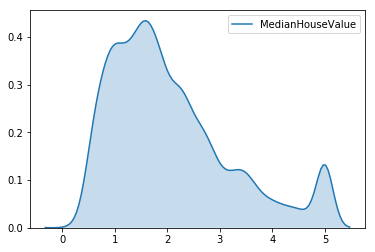

In [18]:
ax = sns.kdeplot(df['MedianHouseValue'], shade=True)

From the histogram previously and kdeplot above, I can see that for the entire dataset on MedianHouseValue, it is mostly a positively skewed distribution with a slight peak of values near the positive tail. 

As I am currently not aware of any python library tools available to deal with imbalanced dataset for regression, I will not be performing any upsampling or downsampling. As far as I know, there are self-built logics such as Synthetic Minority Over-Sampling Technique for Regression (SMOTER) and SMOGN, but i will not be using them here.

**PCA decomposition**

In [19]:
X_poly_train.shape

(14448, 99)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_train_PCA = pca.fit(X_train_scaled)

print(X_train_PCA.explained_variance_ratio_)

print("Sum of Explained Variance Ratio: " + str(round(sum(X_train_PCA.explained_variance_ratio_),4)))

X_train_PCA = pca.fit_transform(X_train_scaled)

X_test_PCA = pca.fit_transform(X_test_scaled)

[0.35682586 0.24605032 0.19903654 0.0813853  0.04648784]
Sum of Explained Variance Ratio: 0.9298


Since there are 99 parameters generated by polynomial features, I have decided to reduce the number of parameters used to 5 instead. Withing these 5, approximately 93% of it could be explained, which is sufficient for the task of predicting the accuracy of the MedianHouseValues.

### Perform Machine Learning Algorithms

I have selected quite a number of different machine learning algorithms to perform regression on the MedianHousingValues. However to be honest, I do not expect very good results as I have achieved with classification problems.

In [21]:
def ML_test(Mdl):
    mdl = Mdl.fit(X_train_scaled, y_train)
    y_pred = mdl.predict(X_test_scaled)
    train_acc_score = "%.2f%%" % (mdl.score(X_train_scaled, y_train)*100)
    test_acc_score = "%.2f%%" % (mdl.score(X_test_scaled, y_test)*100)
    evs = round(explained_variance_score(y_test,y_pred),4)
    mae = round(mean_absolute_error(y_test,y_pred),4)
    mse = round(mean_squared_error(y_test,y_pred),4)
    
    return train_acc_score, test_acc_score, evs, mae, mse

In [22]:
# Prepare an empty summary dataframe to append the data of the various models for comparison
summary = pd.DataFrame(columns=('Model', 'Training Accuracy', 'Test Accuracy Score','Test explained_variance_score', \
                                'Test MAE', 'Test MSE'))

In [23]:
# Linear Regression Model

mdl_LR = LinearRegression()
model_name = "LinearRegression"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_LR)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [24]:
# Ridge Model

mdl_R = Ridge()
Param_grid = {'alpha': list(np.arange(0.1,1.1,0.1))}
model_name = "Ridge"

Mdl = GridSearchCV(mdl_R,Param_grid,cv=10)

train_acc_score, test_acc_score, evs, mae, mse = ML_test(Mdl)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [25]:
# Lasso Model

mdl_L = Lasso()
model_name = "Lasso"

Mdl = GridSearchCV(mdl_L,Param_grid,cv=10)

train_acc_score, test_acc_score, evs, mae, mse = ML_test(Mdl)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [26]:
# Decision Tree Regressor Model

mdl_dt = DecisionTreeRegressor(random_state=1)
model_name = "DecisionTree Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_dt)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [27]:
# Random Forest Regressor Model

mdl_rf = RandomForestRegressor(random_state=1)
model_name = "RandomForest Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_rf)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [28]:
# AdaBoost Regressor Model

mdl_ADR = AdaBoostRegressor(random_state=7).fit(X_train_scaled, y_train)
model_name = "AdaBoost Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_ADR)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)


In [29]:
# Bagging Regressor Model

mdl_BagR = BaggingRegressor(random_state=7).fit(X_train_scaled, y_train)
model_name = "Bagging Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_BagR)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

## Comparative Analysis

In [30]:
summary

,Model,Training Accuracy,Test Accuracy Score,Test explained_variance_score,Test MAE,Test MSE
0,LinearRegression,68.14%,67.64%,0.6765,0.4760,0.4378
1,Ridge,67.96%,67.78%,0.6778,0.4758,0.4360
2,Lasso,58.78%,57.92%,0.5793,0.5636,0.5693
3,DecisionTree Regressor,100.00%,44.18%,0.4420,0.5976,0.7552
4,RandomForest Regressor,96.11%,72.27%,0.7228,0.4269,0.3752
5,AdaBoost Regressor,45.34%,44.69%,0.5763,0.7349,0.7483
6,Bagging Regressor,94.55%,69.91%,0.6992,0.4462,0.4071


For regression problems, I will use a different approach to compare the various Machine Learning models via explanatory variable, mean absolute error and mean squared error.
<br> Comparing the above results, it can be seen that despite overfitting the model during the training phase, the RandomForest Regressor model performs the best overall in terms of test accuracy, explained varianced score, mean absolute error and mean squared error.

## Conclusion

I have gone through the usual preparatory data analysis and perform regression on the adjusted data accounting for polynomial features, scaling and decomposition. At the end of the day, RandomForest Regressor performs the best in terms of test accuracy score, greatest explanatory power and least mean squared error despite overfitting to the training data.